In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def normalize_columns(matrix):
    """
    - This function normalizes the columns of the given matrix by dividing each element of a given column by the sum of the elements
    of that column.
    
    - Specifying an order of 1 in the linalg.norm indicates that we are dividing by the sum of the column. 
    
    -Summing down a column is specified by setting axis = 0.
    """
    return matrix / np.linalg.norm(matrix, ord=1, axis=0, keepdims=True)

In [3]:
def propagate(T, n):
    """
    Propagates the transition probability matrix (TPM) n times
    
    Inputs:
    1. T - the transition probability matrix (TPM)
    2. n - the number of times that the TPM should be propagated
    
    Output:
    1. The propagated TPM
    """
    return np.linalg.matrix_power(T, n)

In [4]:
# Define the transition count matrix; notice that C.T = C, i.e. it is symmetric
C = np.array([[30000.0, 100.0, 0.0, 0.0, 0.0, 0.0],
              [100.0,   10000.0, 3.0, 0.0, 0.0, 0.0],
              [0.0, 3.0, 3000.0, 10.0, 0.0, 0.0],
              [0.0, 0.0, 10.0, 1000.0, 1.0, 0.0],
              [0.0, 0.0, 0.0, 1.0, 300.0, 3.0], 
              [0.0, 0.0, 0.0, 0.0, 3.0, 100.0]])

In [5]:
# normalizes the columns of C before propagation
T = normalize_columns(C)

In [6]:
Tn = propagate(T, 500)
v1 = np.array([1.0, 0.0, 0.0, 0.0, 0.0, 0.0])
v2 = np.array([0.0, 1.0, 0.0, 0.0, 0.0, 0.0])
v3 = np.array([0.0, 0.0, 1.0, 0.0, 0.0, 0.0])
v4 = np.array([0.0, 0.0, 0.0, 1.0, 0.0, 0.0])
v5 = np.array([0.0, 0.0, 0.0, 0.0, 1.0, 0.0])
v6 = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 1.0])
print(Tn)

[[7.32619427e-01 7.19116474e-01 2.00863260e-01 1.53624913e-01
  5.70329356e-02 4.92012223e-02]
 [2.41369891e-01 2.39325248e-01 1.03712869e-01 8.91169999e-02
  4.34356576e-02 3.95600509e-02]
 [2.01063455e-02 3.09301073e-02 4.78681648e-01 4.99506783e-01
  3.66952695e-01 3.54265451e-01]
 [5.15995970e-03 8.91787458e-03 1.67607487e-01 1.81133827e-01
  1.90189298e-01 1.90706045e-01]
 [5.76013702e-04 1.30698208e-03 3.70241020e-02 5.71884735e-02
  2.51326958e-01 2.68766859e-01]
 [1.68362987e-04 4.03314386e-04 1.21106344e-02 1.94290036e-02
  9.10624557e-02 9.75003714e-02]]


In [7]:
# Making sure that each of the basis vectors in R^6 returns the same result
# which denotes the equilibrium populations of each nodes (microstate)
print(np.dot(Tn,v1))
print(np.dot(Tn,v2))
print(np.dot(Tn,v3))
print(np.dot(Tn,v4))
print(np.dot(Tn,v5))
print(np.dot(Tn,v6))

[7.32619427e-01 2.41369891e-01 2.01063455e-02 5.15995970e-03
 5.76013702e-04 1.68362987e-04]
[7.19116474e-01 2.39325248e-01 3.09301073e-02 8.91787458e-03
 1.30698208e-03 4.03314386e-04]
[0.20086326 0.10371287 0.47868165 0.16760749 0.0370241  0.01211063]
[0.15362491 0.089117   0.49950678 0.18113383 0.05718847 0.019429  ]
[0.05703294 0.04343566 0.36695269 0.1901893  0.25132696 0.09106246]
[0.04920122 0.03956005 0.35426545 0.19070605 0.26876686 0.09750037]


In [8]:
# raise to the power of n using loops so that we can extract eigenvalues
ctr = 0
n = 500
Tn_loop = np.identity(6)
time = np.arange(n)
ITS0 = np.zeros(n, float)
ITS1 = np.zeros(n, float)
ITS2 = np.zeros(n, float)
ITS3 = np.zeros(n, float)
ITS4 = np.zeros(n, float)
ITS5 = np.zeros(n, float)


while (ctr < n):
    Tn_loop = np.dot(Tn_loop, T)
    eig, unitary = np.linalg.eig(Tn_loop)
    
    eig = np.sort(eig, axis=None)
    #print(eig)
    
    lbda0 = eig[0]
    lbda1 = eig[1]
    lbda2 = eig[2]
    lbda3 = eig[3]
    lbda4 = eig[4]
    #lbda5 = eig[5]
    
    ITS0[ctr] = - float(ctr) / np.log(lbda0)
    ITS1[ctr] = - float(ctr) / np.log(lbda1)
    ITS2[ctr] = - float(ctr) / np.log(lbda2)
    ITS3[ctr] = - float(ctr) / np.log(lbda3)
    ITS4[ctr] = - float(ctr) / np.log(lbda4)
    #ITS5[ctr] = - float(ctr) / np.log(lbda5)
    
    ctr = ctr + 1
    
#print(Tn_loop)

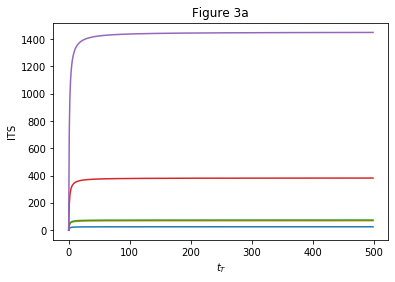

In [9]:
plt.title('Figure 3a')
plt.plot(time, ITS0)
plt.plot(time, ITS1)
plt.plot(time, ITS2)
plt.plot(time, ITS3)
plt.plot(time, ITS4)
#plt.plot(time, ITS5)
plt.xlabel("$ t_T $")
plt.ylabel("ITS")
plt.show()

In [10]:
# define matrices for the good lumpings
A = np.array([[1.0, 1.0, 0.0, 0.0, 0.0, 0.0],
                 [0.0, 0.0, 1.0, 1.0, 0.0, 0.0],
                 [0.0, 0.0, 0.0, 0.0, 1.0, 1.0]]).T

print(A)

[[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]


## Working towards building the figures for the three state model

In [11]:
# create matrix where the diagonal elements are the equilibrium populations of each microstate
pop_eq = np.dot(Tn,v1)
PI = np.diag(pop_eq)
PI_inv = np.linalg.inv(PI)
print(PI)

[[7.32619427e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.41369891e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.01063455e-02 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 5.15995970e-03
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.76013702e-04 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.68362987e-04]]


In [12]:
# three-state model for good and bad lumpings
DN = np.dot(A.T, np.dot(PI, A))
print(DN)

[[9.73989318e-01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.52663053e-02 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 7.44376689e-04]]


This block of code takes the existing propagated T matrix and computes $\tau (t)$ via
\begin{align*}
    \tau (t) =  A^T \cdot T(t) \cdot \Pi \cdot A \cdot D^{-1}.
\end{align*}

In [13]:
def get_M(T):
    # T(0) = I so T_at_1 is just the output from above
    T_at_1 = T

    # find the symmetric matrix that diagonalizes T
    eig, symmetric = np.linalg.eigh(T_at_1)

    # this should be close to the 6x6 identity
    #print(np.dot(symmetric, symmetric.T))

    # diagonalize it
    D = np.dot(np.dot(symmetric.T, T), symmetric)
    D_diagonal_elements = np.diag(D)
    log_D_diag = np.log(D_diagonal_elements)
    log_D_diag_matrix = np.diag(log_D_diag)

    #print(log_D_diag_matrix)

    # compute M
    M = - np.dot(np.dot(symmetric, log_D_diag_matrix), symmetric)
    #print(M)
    
    return M

In [14]:
# construct the derivative of tau at zero
M = get_M(T)
PAD = np.dot(np.dot(PI, A), np.linalg.inv(DN))
AT_zero = np.dot(A.T, M)
AT_zero_squared = np.dot(A.T, np.dot(M, M))

# getting the derivative of tau evaluated at zero, this is used a lot
tau_1st_deriv_zero = np.dot(AT_zero, PAD)

In [15]:
# raise to the power of n using loops so that we can extract eigenvalues
ctr = 0
n = 500
dim_red = 3
tau_n_loop = np.identity(dim_red)
Tn_loop1 = np.identity(6)

# d/dt T(t) at t = 0 which is M matrix
M = get_M(T)
M2 = np.dot(M,M)

# initialize arrays
time = np.arange(n)
ITS0 = np.zeros(n, float)
ITS1 = np.zeros(n, float)

auxk1 = np.empty([3, 3, n], dtype='float')
auxk3 = np.empty_like(auxk1)
tau = np.empty_like(auxk1)

# this generates the terms needed for the memory kernel 
# also we get the eigenvalues of the tau-TPM so that we can plot the implied time scale for the 3x3 system
while (ctr < n):
        Tn_loop1 = np.dot(Tn_loop1, T)
        
        # get the first and second derivatives of tau(t) using T'(t) = T'(0)T(t)
        PAD = np.dot(PI, np.dot(A, np.linalg.inv(DN)))
        TPAD = np.dot(Tn_loop1, PAD)
        tau[:, :, ctr] = np.dot(A.T, TPAD)
        
        tau_1st_deriv = np.dot(A.T, np.dot(M, TPAD))
        tau_2nd_deriv = np.dot(A.T, np.dot(M2, TPAD))
        
        #TPAD = np.dot(Tn_loop1, np.dot())
        #a = np.dot(A.T, Tn_loop1)
        #b = np.dot(a, PI)
        #c = np.dot(b, A)
        #tau = np.dot(c, np.linalg.inv(DN))
        
        # term one is the tau_2nd_deriv
        term_2 = np.dot(tau_1st_deriv, tau_1st_deriv_zero)
        term_3 = np.dot(tau_1st_deriv_zero, tau_1st_deriv)
        term_4 = np.dot(term_3, tau_1st_deriv_zero)
        
        auxk1[:, :, ctr] =  tau_2nd_deriv - term_2 - term_3 + term_4
        auxk3[:, :, ctr] = - tau_1st_deriv + term_3
        
        eig, unitary = np.linalg.eig(tau[:, :, ctr])
        eig = np.sort(eig, axis=None)
        #print(eig)
    
        lbda0 = eig[0]
        lbda1 = eig[1]
    
        ITS0[ctr] = - float(ctr) / np.log(lbda0)
        ITS1[ctr] = - float(ctr) / np.log(lbda1)
        
        ctr = ctr + 1

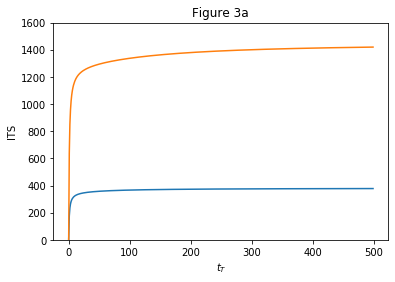

In [16]:
plt.title('Figure 3a')
plt.plot(time, ITS0)
plt.plot(time, ITS1)
#plt.plot(time, ITS2)
plt.xlabel("$ t_T $")
plt.ylabel("ITS")
plt.ylim((0,1600))
plt.show()

In [17]:
# define the time-step and the prefactor
dt = 1
temp = np.identity(3) - dt * auxk3[:,:,0] / 2
prefac = np.linalg.inv(temp)

# generate the memory kernel
mem = np.empty_like(auxk1)

# at t = 0
mem[:,:,0] = auxk1[:,:,0]

# at t = 1, trap term includes K^1(1) + terms from trapezoidal rule
trap_term = auxk1[:,:,1] + dt * np.dot(auxk3[:,:,1], mem[:,:,0])
mem[:,:,1] = np.dot(prefac, trap_term)

for j in range(2, n):
    trap_int = np.dot(auxk3[:,:,j], mem[:,:,0]) / 2
    
    for k in range(1, j):
        trap_int = trap_int + np.dot(auxk3[:,:,j-k], mem[:,:,k])
    
    mem[:,:,j] = np.dot(prefac, auxk1[:,:,j] + dt * trap_int)

In [18]:
# trying to plot the MIK, the mean integral of the memory kernel
MIK = np.zeros(n, dtype = float)
calc = 0.0

for j in range(1, n):
    
    temp = mem[:,:,j-1] + mem[:,:,j]
    calc = calc + dt * np.sum(np.dot(temp,temp)) / 2
    
    #print(calc)
    MIK[j] = np.sqrt(calc) / dim_red

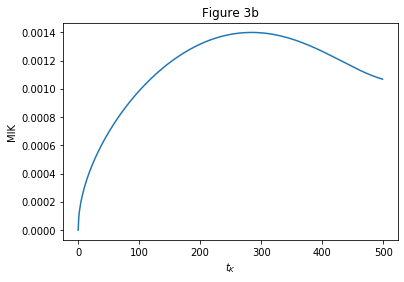

In [24]:
plt.title('Figure 3b')
plt.plot(time, MIK)
plt.xlabel("$ t_K $")
plt.ylabel("MIK")
#plt.ylim((0,10/10**4))
plt.show()

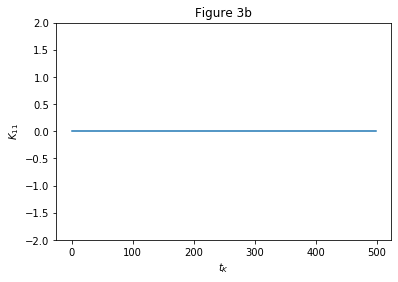

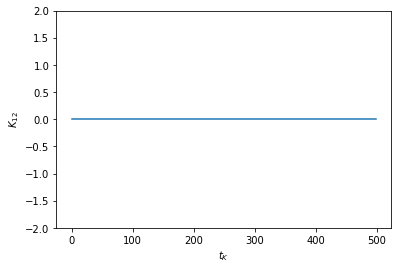

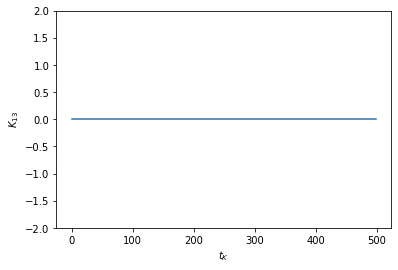

In [20]:
# all the row 1 kernel elements
plt.title('Figure 3b')
plt.plot(time, mem[0,0,:])
plt.xlabel("$ t_K $")
plt.ylabel("$K_{11}$")
plt.ylim((-2,2))
plt.show()

plt.plot(time, mem[0,1,:])
plt.xlabel("$ t_K $")
plt.ylabel("$K_{12}$")
plt.ylim((-2,2))
plt.show()

plt.plot(time, mem[0,2,:])
plt.xlabel("$ t_K $")
plt.ylabel("$K_{13}$")
plt.ylim((-2,2))
plt.show()

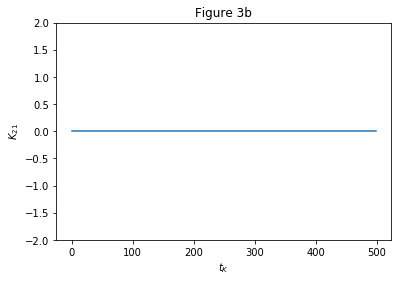

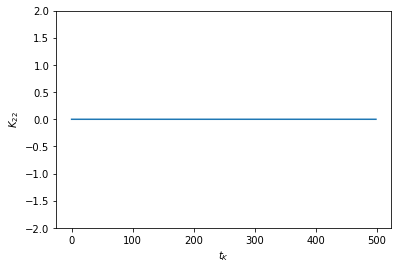

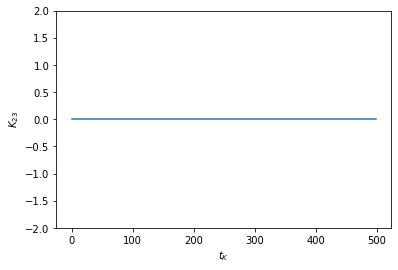

In [21]:
# all the row 2 kernel elements
plt.title('Figure 3b')
plt.plot(time, mem[1,0,:])
plt.xlabel("$ t_K $")
plt.ylabel("$K_{21}$")
plt.ylim((-2,2))
plt.show()

plt.plot(time, mem[1,1,:])
plt.xlabel("$ t_K $")
plt.ylabel("$K_{22}$")
plt.ylim((-2,2))
plt.show()

plt.plot(time, mem[1,2,:])
plt.xlabel("$ t_K $")
plt.ylabel("$K_{23}$")
plt.ylim((-2,2))
plt.show()

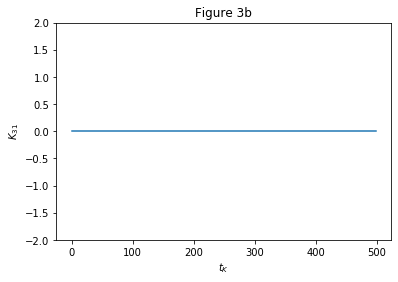

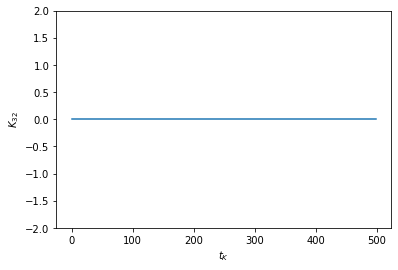

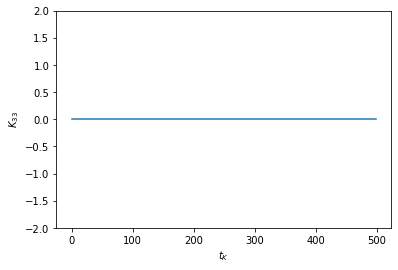

In [22]:
# all the row 3 kernel elements
plt.title('Figure 3b')
plt.plot(time, mem[2,0,:])
plt.xlabel("$ t_K $")
plt.ylabel("$K_{31}$")
plt.ylim((-2,2))
plt.show()

plt.plot(time, mem[2,1,:])
plt.xlabel("$ t_K $")
plt.ylabel("$K_{32}$")
plt.ylim((-2,2))
plt.show()

plt.plot(time, mem[2,2,:])
plt.xlabel("$ t_K $")
plt.ylabel("$K_{33}$")
plt.ylim((-2,2))
plt.show()